### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### Loading and Exploring the Data

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

### Data Cleaning

In [4]:
df = df.replace('?', np.nan)

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Preprocessing

In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [9]:
oe = OrdinalEncoder()
X_encoded = oe.fit_transform(X)

### Splitting the Data and Training

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [11]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


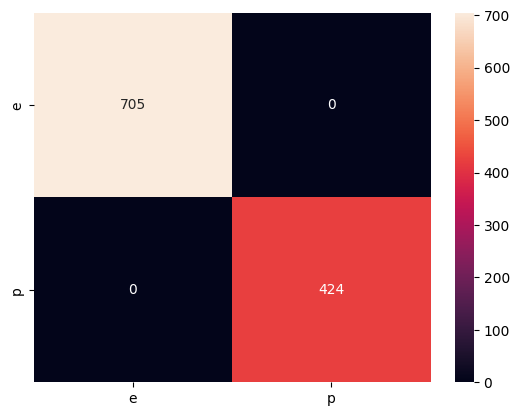

In [14]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.show()

In [15]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       705
           p       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



### Visualization

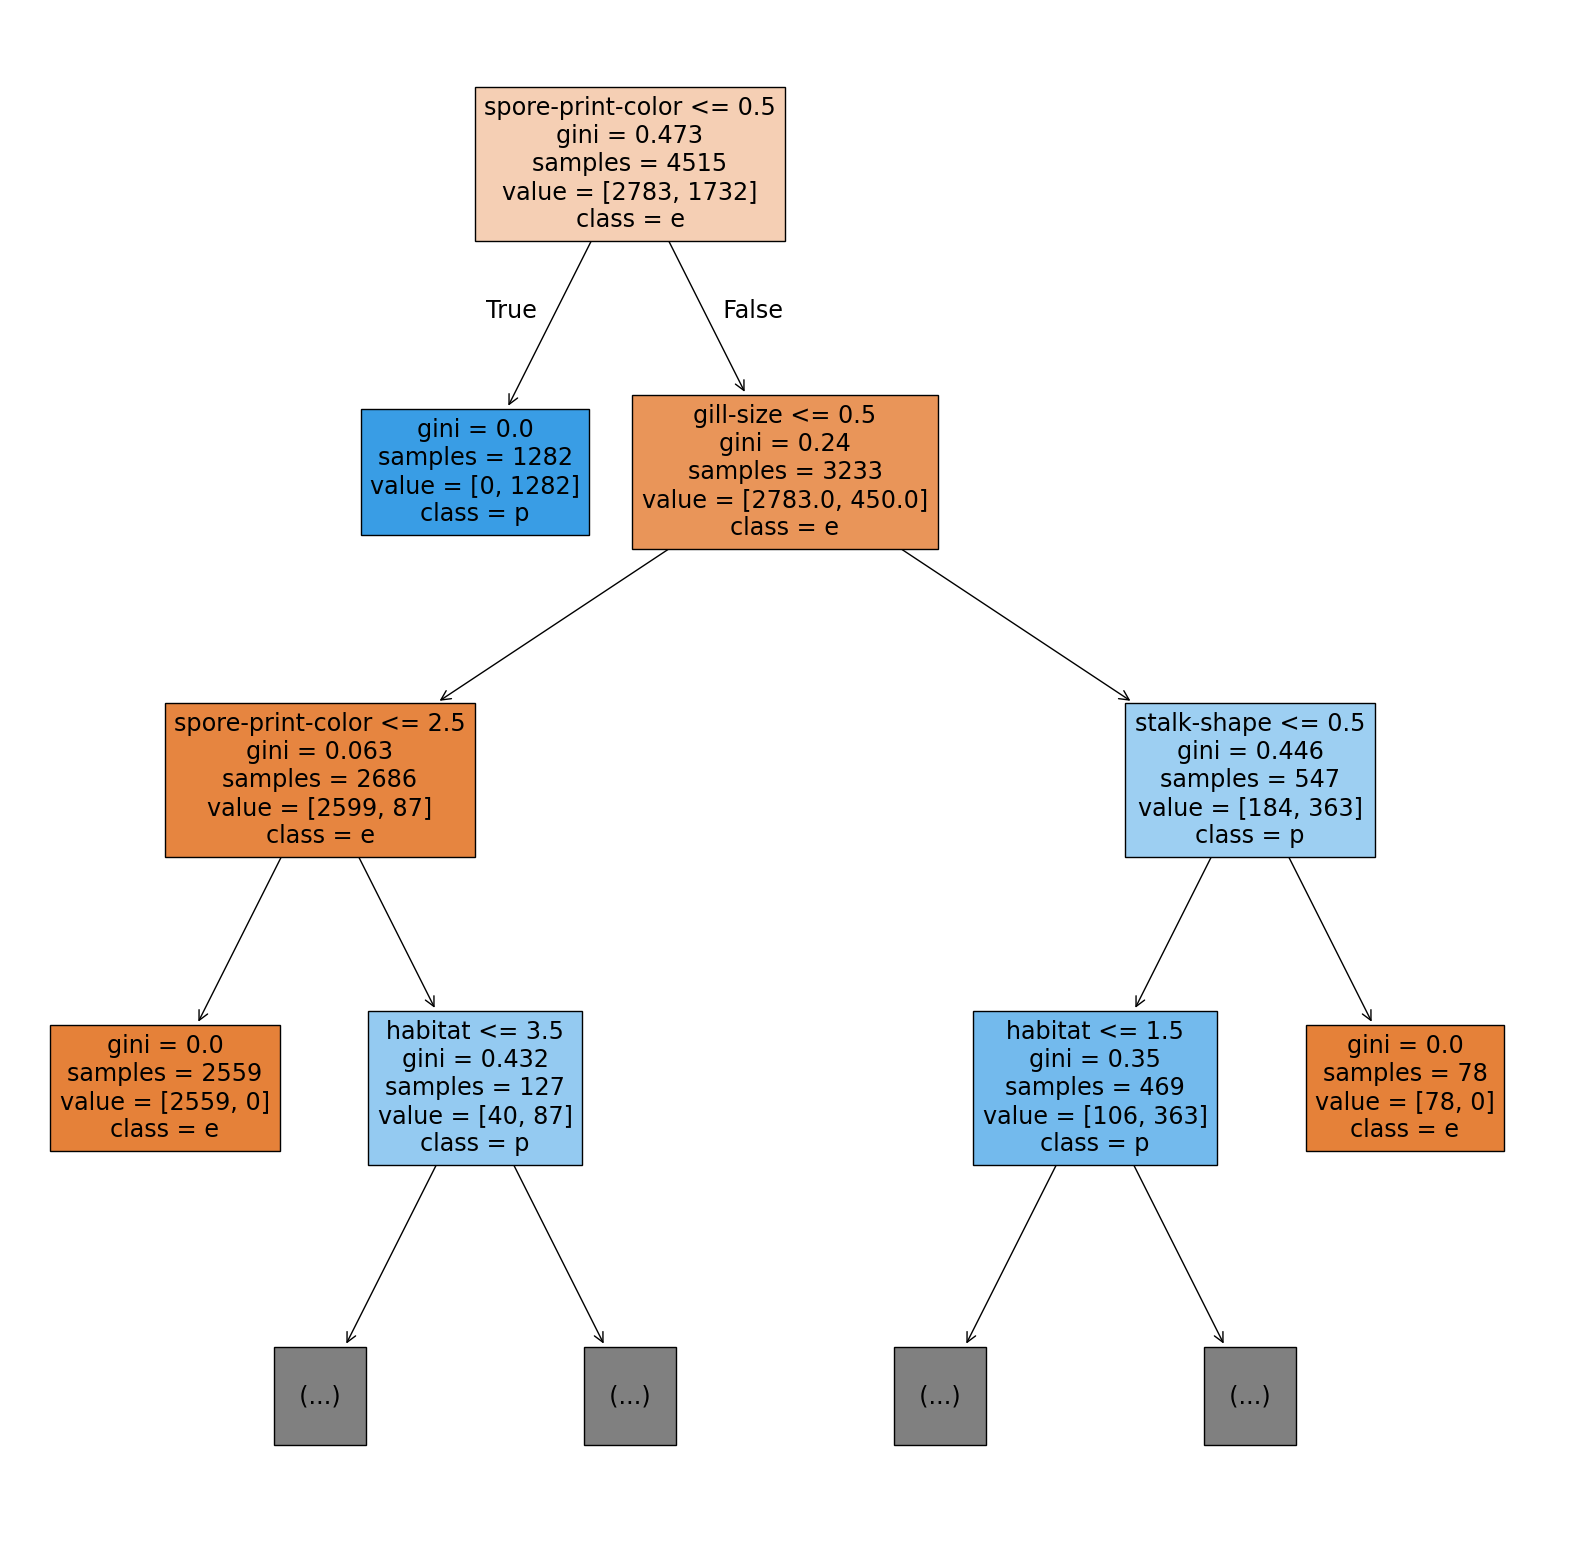

In [23]:
plt.figure(figsize=(20, 20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=le.classes_, max_depth=3)
plt.show()